In [4]:
%load_ext autoreload
%autoreload 2

import FNN_Train as FNN_Train
import torch
import numpy as np
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
fnn_train = FNN_Train.FNN_Train()
fnn_train.train()

fnn_train_do = FNN_Train.FNN_Train()
fnn_train_do.dropout = 0.1
fnn_train_do.train()

*Use trainBatchSize: 20
*Use device: mps
*Use dropout: None
*Fields Models Will Be Trained with Epochs {'T': 100}.
Train from dict_T.pth
*Model structure:
Sequential(
  (0): Linear(in_features=3, out_features=100, bias=True)
  (1): LeakyReLU(negative_slope=0.02)
  (2): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
  (3): Linear(in_features=100, out_features=300, bias=True)
  (4): LeakyReLU(negative_slope=0.02)
  (5): LayerNorm((300,), eps=1e-05, elementwise_affine=True)
  (6): Linear(in_features=300, out_features=1000, bias=True)
  (7): LeakyReLU(negative_slope=0.02)
  (8): LayerNorm((1000,), eps=1e-05, elementwise_affine=True)
  (9): Linear(in_features=1000, out_features=125557, bias=True)
  (10): Identity()
)
Initialize model weights
*Now we are training T field:
 >> Training T, epoch 1/100
 >> Training T, epoch 2/100
 >> Training T, epoch 3/100
 >> Training T, epoch 4/100
 >> Training T, epoch 5/100
 >> Training T, epoch 6/100
 >> Training T, epoch 7/100
 >> Training T, epoc

In [11]:
LInfLossTrain = fnn_train.res_trn_hist["T"]
LInfLossTest = fnn_train.res_tst_hist["T"]

LInfLossTrainDo = fnn_train_do.res_trn_hist["T"]
LInfLossTestDo = fnn_train_do.res_tst_hist["T"]

LInfLossTrainMean = {}
LInfLossTestMean = {}
LInfLossTrainStd = {}
LInfLossTestStd = {}

LInfLossTrainMean['vanilla'] = [np.mean(epoch) for epoch in LInfLossTrain]
LInfLossTestMean['vanilla'] = [np.mean(epoch) for epoch in LInfLossTest]
LInfLossTrainStd['vanilla'] = [np.std(epoch) for epoch in LInfLossTrain]
LInfLossTestStd['vanilla'] = [np.std(epoch) for epoch in LInfLossTest]

LInfLossTrainMean['dropout'] = [np.mean(epoch) for epoch in LInfLossTrainDo]
LInfLossTestMean['dropout'] = [np.mean(epoch) for epoch in LInfLossTestDo]
LInfLossTrainStd['dropout'] = [np.std(epoch) for epoch in LInfLossTrainDo]
LInfLossTestStd['dropout'] = [np.std(epoch) for epoch in LInfLossTestDo]


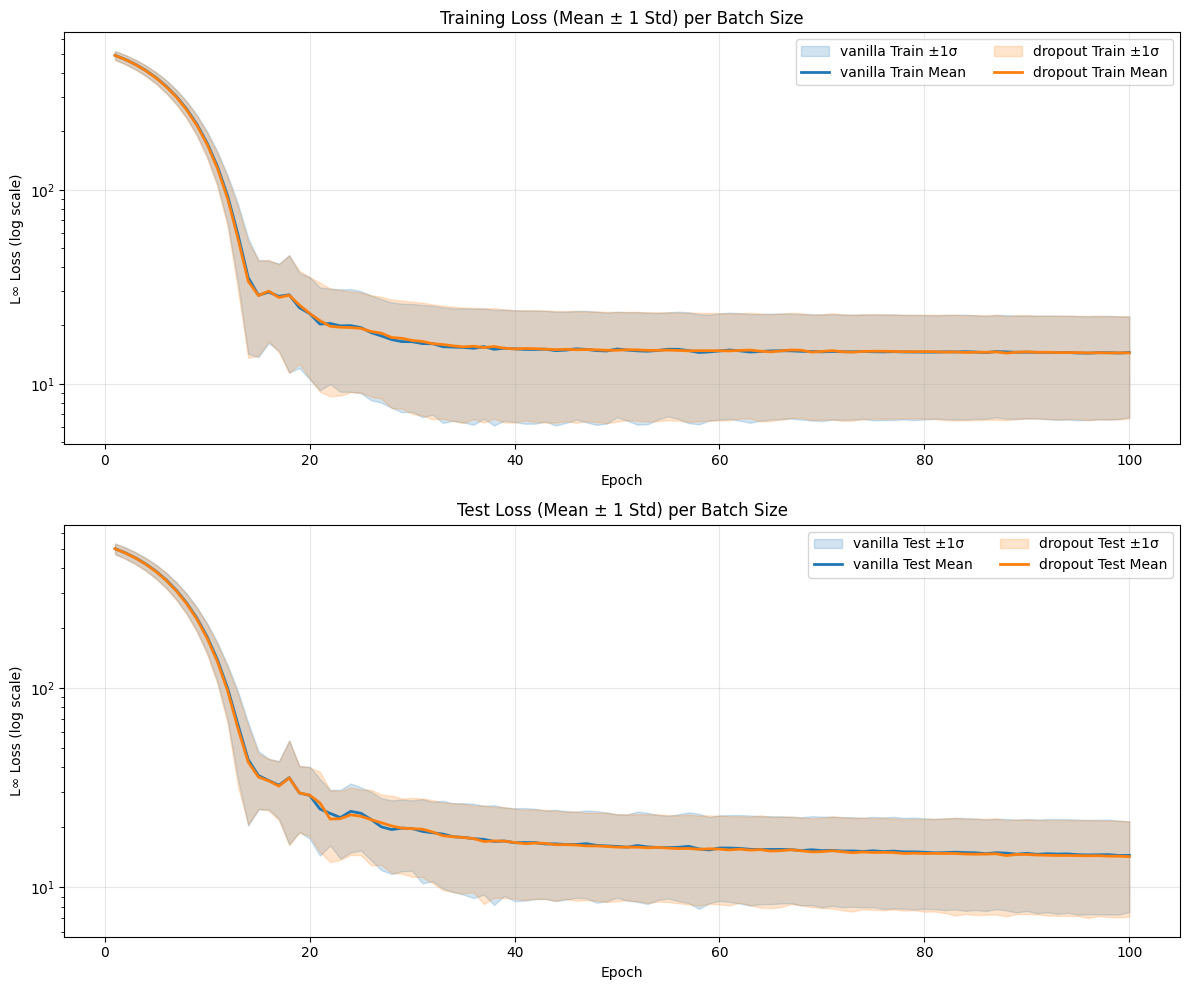

In [12]:

epochs = list(range(1, 101))
batchSizes = [1, 10, 20]  # Make sure this matches your data

# Choose distinct colors for each batch size
colors = {'vanilla': 'tab:blue', 'dropout': 'tab:orange'}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# --- Training Loss ---
for i, type in enumerate(['vanilla', 'dropout']):
    # Only add label for the first batch size to avoid duplicate legends
    ax1.fill_between(
        epochs, 
        np.array(LInfLossTrainMean[type]) - np.array(LInfLossTrainStd[type]),
        np.array(LInfLossTrainMean[type]) + np.array(LInfLossTrainStd[type]),
        alpha=0.2, color=colors[type], 
        label=f'{type} Train ±1σ'
    )
    ax1.plot(
        epochs, LInfLossTrainMean[type], '-', linewidth=2, color=colors[type],
        label=f'{type} Train Mean'
    )

ax1.set_yscale('log')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('L∞ Loss (log scale)')
ax1.set_title('Training Loss (Mean ± 1 Std) per Batch Size')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10, ncol=2)

# --- Test Loss ---
for i, type in enumerate(['vanilla', 'dropout']):
    ax2.fill_between(
        epochs, 
        np.array(LInfLossTestMean[type]) - np.array(LInfLossTestStd[type]),
        np.array(LInfLossTestMean[type]) + np.array(LInfLossTestStd[type]),
        alpha=0.2, color=colors[type], 
        label=f'{type} Test ±1σ'
    )
    ax2.plot(
        epochs, LInfLossTestMean[type], '-', linewidth=2, color=colors[type],
        label=f'{type} Test Mean'
    )

ax2.set_yscale('log')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('L∞ Loss (log scale)')
ax2.set_title('Test Loss (Mean ± 1 Std) per Batch Size')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=10, ncol=2)

plt.tight_layout()
plt.show()

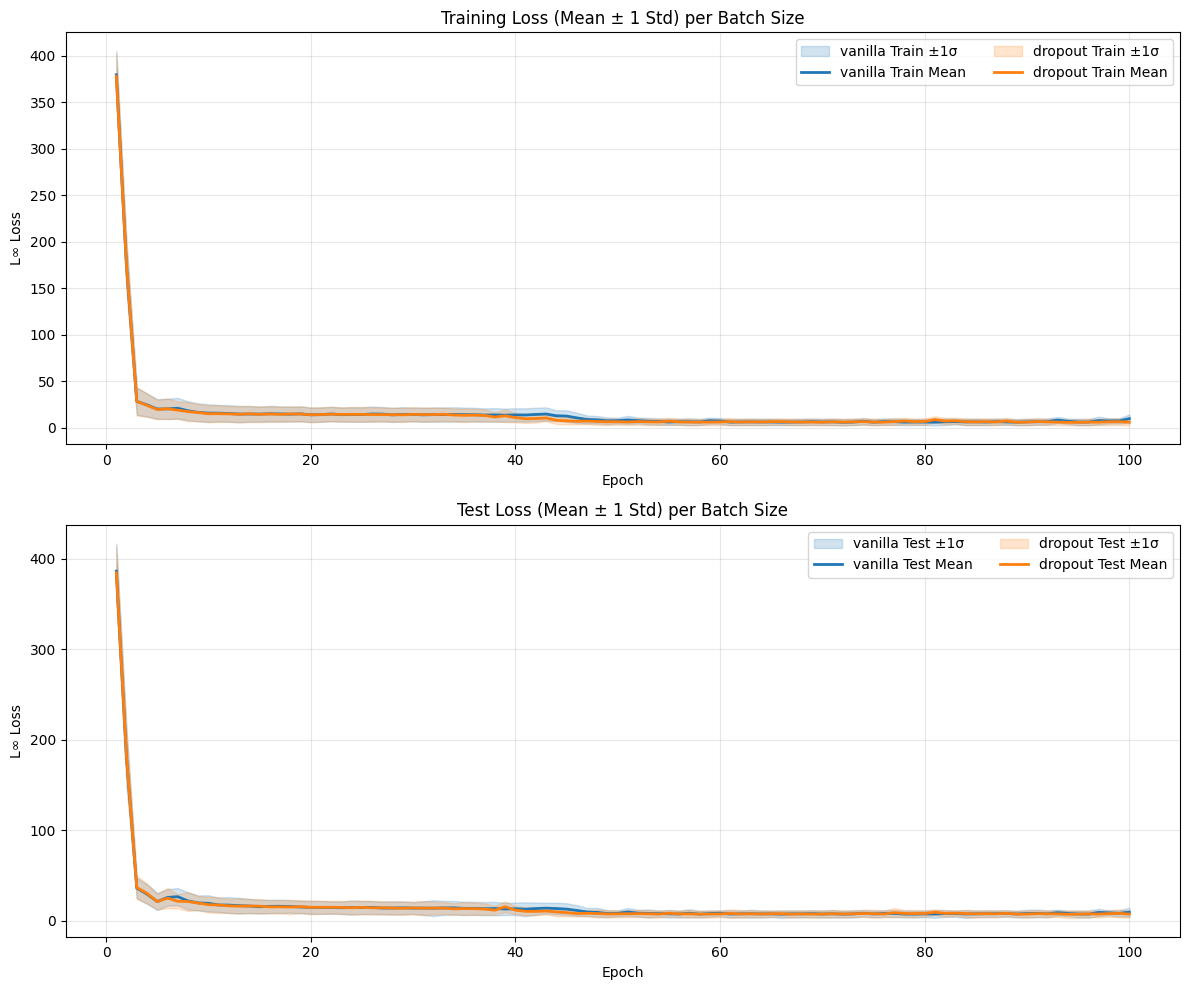

In [6]:
epochs = list(range(1, 101))
batchSizes = [1, 10, 20]  # Make sure this matches your data

# Choose distinct colors for each batch size
colors = {'vanilla': 'tab:blue', 'dropout': 'tab:orange'}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# --- Training Loss ---
for i, type in enumerate(['vanilla', 'dropout']):
    # Only add label for the first batch size to avoid duplicate legends
    ax1.fill_between(
        epochs, 
        np.array(LInfLossTrainMean[type]) - np.array(LInfLossTrainStd[type]),
        np.array(LInfLossTrainMean[type]) + np.array(LInfLossTrainStd[type]),
        alpha=0.2, color=colors[type], 
        label=f'{type} Train ±1σ'
    )
    ax1.plot(
        epochs, LInfLossTrainMean[type], '-', linewidth=2, color=colors[type],
        label=f'{type} Train Mean'
    )

ax1.set_xlabel('Epoch')
ax1.set_ylabel('L∞ Loss')
ax1.set_title('Training Loss (Mean ± 1 Std) per Batch Size')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10, ncol=2)

# --- Test Loss ---
for i, type in enumerate(['vanilla', 'dropout']):
    ax2.fill_between(
        epochs, 
        np.array(LInfLossTestMean[type]) - np.array(LInfLossTestStd[type]),
        np.array(LInfLossTestMean[type]) + np.array(LInfLossTestStd[type]),
        alpha=0.2, color=colors[type], 
        label=f'{type} Test ±1σ'
    )
    ax2.plot(
        epochs, LInfLossTestMean[type], '-', linewidth=2, color=colors[type],
        label=f'{type} Test Mean'
    )

ax2.set_xlabel('Epoch')
ax2.set_ylabel('L∞ Loss')
ax2.set_title('Test Loss (Mean ± 1 Std) per Batch Size')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=10, ncol=2)

plt.tight_layout()
plt.show()